# Project by : Mohammed Saqlain Attar

## New DG Food Agro are a multinational exporter of various grains from India since nearly 130 years. But their main product of exporting since early 1980s has been Wheat. They export wheat to countries like America, Afghanistan, Australia etc. They started seeing varying exports of sales year on year for various countries. The reason that was theorized by them had a lot of natural causes like floods, country growth, population explosion etc. Now they need to decide which countries fall in the same range of export and which don’t. They also need to know which countries export is low and can be improved and which countries are performing very well across the years.

## The data provided right now is across 18 years. What they need is a repeatable solution which won’t get affected no matter how much data is added across time and that they should be able to explain the data across years in less number of variables.

## Objective: Our objective is to cluster the countries based on various sales data provided to us across years. We have to apply an unsupervised learning technique like K means or Hierarchical clustering so as to get the final solution. But before that we have to bring the exports (in tons) of all countries down to same scale across years. Plus, as this solution needs to be repeatable we will have to do PCA so as to get the principal components which explain max variance.

In [1]:
import numpy as np
import pandas as pd

### Read the data file and cleanse the data if required to remove null or blank values 

In [2]:
df = pd.read_csv('Project_Data_1.csv', index_col='Sales of Wheat in tons',thousands=',')
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130


In [4]:
df.isna().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

In [5]:
df.dtypes

1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
dtype: object

In [6]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,196.966184,196.468599,192.811594,191.173913,188.724638,187.942029,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,173.922705,171.183575,169.019324,167.256039
std,232.385067,229.329664,224.805522,220.093799,216.750218,212.477587,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,210.486938,211.218437,211.057714,212.246576
min,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.500000,37.000000,34.000000,32.500000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,21.000000,19.500000,18.000000,19.000000
50%,96.000000,93.000000,91.000000,88.000000,89.000000,92.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,71.000000,66.000000,65.000000,65.000000
75%,290.000000,315.500000,320.000000,316.500000,314.000000,310.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.500000,282.500000,277.500000,278.000000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


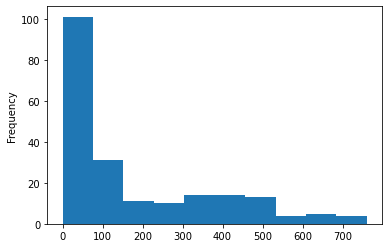

In [3]:
df['2000'].plot(kind='hist')

#### Data is skewed

### After the EDA part is done, our objective is to cluster the countries based on various sales data provided to us across years.K-Means Clustering seems to be the appropriate algorithm

### As we need to make this across years we need to apply PCA first.

### Apply PCA on the dataset and find the number of principal components which explain nearly all the variance.

### Scaling the Data

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc = MinMaxScaler()

In [9]:
df_scaled = sc.fit_transform(df)

In [10]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,0.293603,0.289009,0.286986,0.286310,0.287836,0.285922,0.436264,0.453693,0.481338,0.484416,0.454665,0.391827,0.324731,0.320833,0.273694,0.255258,0.229643,0.215580
Albania,0.028283,0.025102,0.026027,0.027102,0.029703,0.029028,0.046154,0.051583,0.055341,0.054545,0.052562,0.040865,0.032258,0.033333,0.028046,0.027725,0.023788,0.019928
Algeria,0.030303,0.027815,0.028082,0.027797,0.030410,0.028302,0.047253,0.051583,0.057915,0.059740,0.063075,0.058894,0.051613,0.053125,0.050290,0.050669,0.050320,0.050725
American Samoa,0.028283,0.007463,0.000685,0.010424,0.012023,0.013788,0.000000,0.029308,0.015444,0.010390,0.010512,0.007212,0.003226,0.006250,0.008704,0.010516,0.008234,0.004529
Andorra,0.026263,0.023066,0.021918,0.020848,0.022631,0.019594,0.030769,0.026964,0.030888,0.028571,0.026281,0.024038,0.020430,0.018750,0.018375,0.017208,0.015554,0.017210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,0.084848,0.236771,0.041781,0.118833,0.121641,0.065312,0.135165,0.249707,0.137709,0.136364,0.135348,0.015625,0.293548,0.153125,0.060928,0.054493,0.054895,0.022645
West Bank and Gaza,0.037037,0.034600,0.034932,0.034051,0.036775,0.034107,0.053846,0.053927,0.056628,0.054545,0.052562,0.046875,0.037634,0.037500,0.033849,0.031549,0.029277,0.028080
Yemen,0.178451,0.175034,0.178082,0.173732,0.176803,0.174891,0.256044,0.242673,0.249678,0.227273,0.215506,0.185096,0.158065,0.152083,0.133462,0.130975,0.123513,0.117754


### PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)

In [13]:
pca.fit(df_scaled)

PCA(n_components=2)

In [14]:
pca.explained_variance_ratio_

array([0.93080588, 0.04525079])

In [15]:
pca.explained_variance_ratio_.sum()

0.9760566685041137

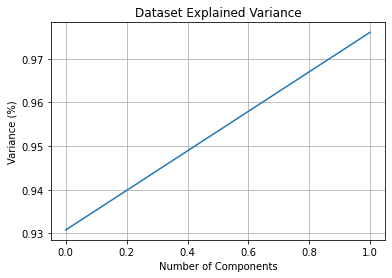

In [16]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.grid(True)
plt.show()

In [17]:
df_pca = pca.transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1','PC2'])
df_pca.index = df.index

df_pca

,PC1,PC2
Sales of Wheat in tons,,
Afghanistan,0.698500,0.201459
Albania,-0.599418,-0.005157
Algeria,-0.553836,-0.043633
American Samoa,-0.709918,-0.012397
Andorra,-0.656797,-0.006833
...,...,...
Wallis et Futuna,-0.252735,0.097516
West Bank and Gaza,-0.579094,0.000206
Yemen,0.011734,0.151254


### Plotting elbow chart to find out optimal number of clusters.

In [18]:
from sklearn.cluster import KMeans

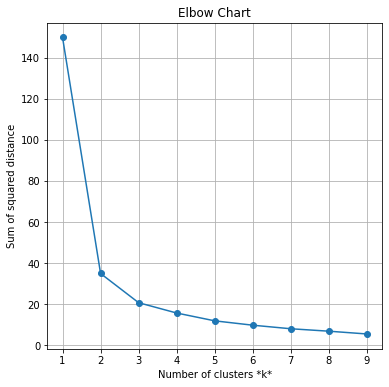

In [19]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_pca)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.grid(True)
plt.title('Elbow Chart')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

### Choosing k=3

## K-Means Algorithm 

In [20]:
km = KMeans(n_clusters=3)

km.fit(df_pca)

KMeans(n_clusters=3)

In [21]:
centroids = km.cluster_centers_
centroids

array([[-0.51307395,  0.00332638],
       [ 0.78423529, -0.03221435],
       [ 1.85571241,  0.06182278]])

In [22]:
labels = km.labels_
labels

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 2])

### Data points in each Cluster

In [23]:
unique, counts = np.unique(km.labels_, return_counts=True)

print(dict(zip(unique,counts)))

{0: 140, 1: 49, 2: 18}


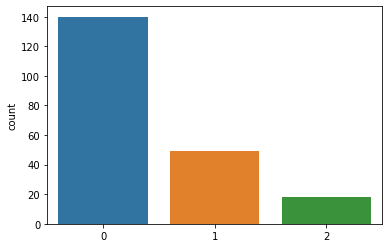

In [24]:
import seaborn as sns
sns.countplot(labels)

In [25]:
df_pca['Cluster'] = labels
df_pca

,PC1,PC2,Cluster
Sales of Wheat in tons,,,
Afghanistan,0.698500,0.201459,1
Albania,-0.599418,-0.005157,0
Algeria,-0.553836,-0.043633,0
American Samoa,-0.709918,-0.012397,0
Andorra,-0.656797,-0.006833,0
...,...,...,...
Wallis et Futuna,-0.252735,0.097516,0
West Bank and Gaza,-0.579094,0.000206,0
Yemen,0.011734,0.151254,0


## Plotting Clusters

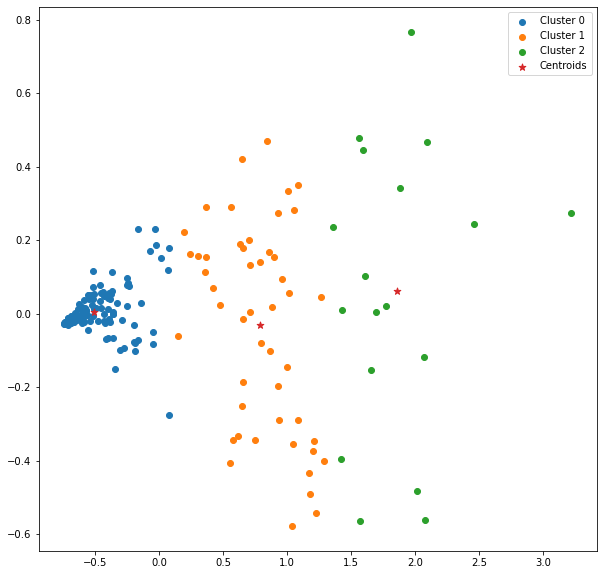

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca.loc[df_pca['Cluster']==0,'PC1'],df_pca.loc[df_pca['Cluster']==0,'PC2'],label='Cluster 0')
plt.scatter(df_pca.loc[df_pca['Cluster']==1,'PC1'],df_pca.loc[df_pca['Cluster']==1,'PC2'],label='Cluster 1')
plt.scatter(df_pca.loc[df_pca['Cluster']==2,'PC1'],df_pca.loc[df_pca['Cluster']==2,'PC2'],label='Cluster 2')
plt.scatter(centroids[:,0],centroids[:,1],marker='*',label='Centroids',s=50)
plt.legend()

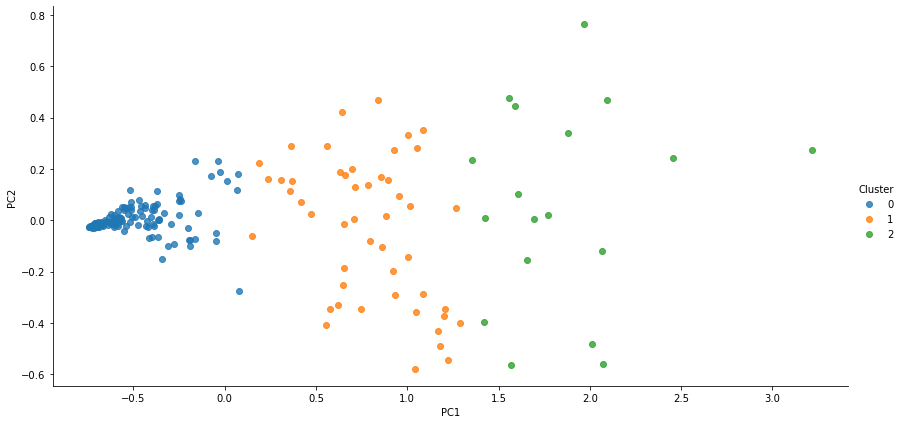

In [27]:
import seaborn as sns

sns.lmplot('PC1','PC2', data=df_pca, hue='Cluster', height=6, aspect=2, fit_reg=False)

### Performing some analysis on Clusters

In [28]:
df['Total'] = df.sum(axis=1)
df['Cluster'] = labels
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Total,Cluster
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,6360,1
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,665,0
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,853,0
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,221,0
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25,2272,0
West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31,781,0
Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130,3498,0


## Top 5 Largest Importers from 1990-2007

In [29]:
df.sort_values(by='Total', ascending=False).nlargest(5, 'Total')

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Total,Cluster
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,,,
Djibouti,1485,1477,1463,1442,1414,1381,720,669,698,701,761,775,932,960,1034,1046,1093,1104,19155,2
Cambodia,928,905,881,858,836,811,810,789,777,764,758,750,728,712,696,676,672,664,14015,2
Kiribati,1026,1006,986,966,947,928,910,853,571,556,546,607,587,477,439,419,405,423,12652,2
"Korea, Dem. Rep.",841,828,815,802,788,775,775,775,775,770,713,650,577,527,499,508,500,441,12359,2
Togo,702,687,668,647,628,614,613,658,637,647,656,669,701,693,702,713,726,750,12111,2


## Locating Cluster 2

In [30]:
Cluster_2 = df.loc[df['Cluster']==2]
Cluster_2

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Total,Cluster
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,,,
Bangladesh,639,623,608,594,579,576,550,535,516,492,500,491,478,458,444,416,392,387,9278,2
Bhutan,924,862,804,750,699,651,620,597,551,538,515,512,472,460,443,412,406,363,10579,2
Cambodia,928,905,881,858,836,811,810,789,777,764,758,750,728,712,696,676,672,664,14015,2
"Korea, Dem. Rep.",841,828,815,802,788,775,775,775,775,770,713,650,577,527,499,508,500,441,12359,2
"Congo, Dem. Rep.",275,306,327,352,376,411,420,466,472,528,592,643,697,708,710,702,692,666,9343,2
Djibouti,1485,1477,1463,1442,1414,1381,720,669,698,701,761,775,932,960,1034,1046,1093,1104,19155,2
Kiribati,1026,1006,986,966,947,928,910,853,571,556,546,607,587,477,439,419,405,423,12652,2
Mali,640,631,621,609,597,583,573,566,565,567,571,573,572,578,584,589,593,599,10611,2
Mauritania,585,587,590,592,594,595,622,615,612,615,619,624,632,642,494,565,556,559,10698,2


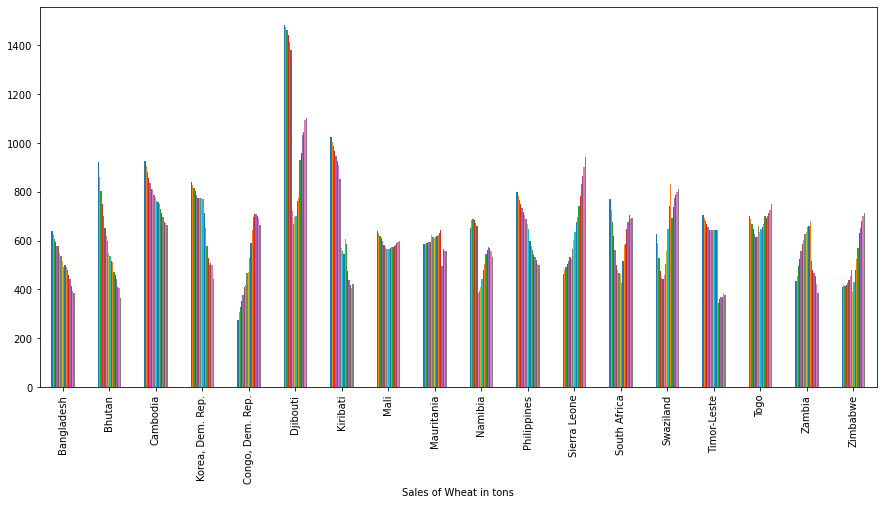

In [31]:
Cluster_2.loc[:,'1990':'2007'].plot(kind='bar', legend=False, figsize=(15,7))

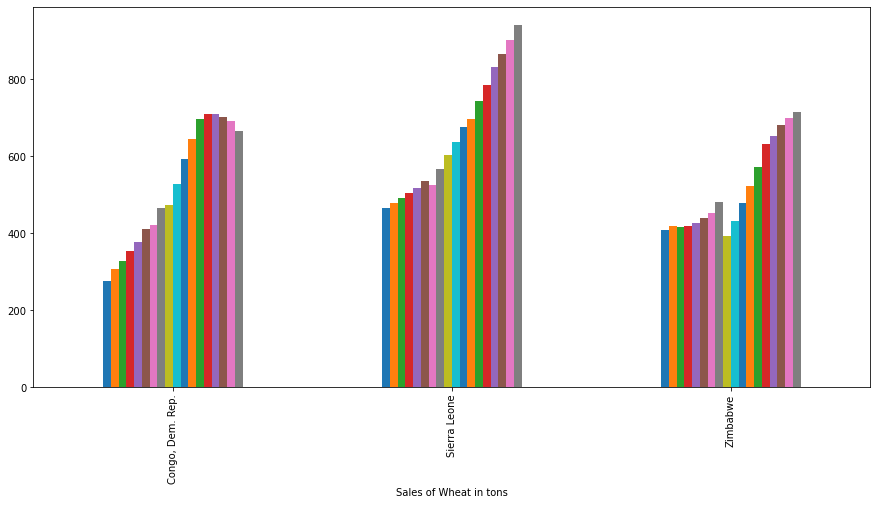

In [32]:
Cluster_2.loc[['Congo, Dem. Rep.','Sierra Leone','Zimbabwe'],'1990':'2007'].plot(kind='bar', legend=False, figsize=(15,7))

### We can see that countries like Congo, Dem. Rep.,Sierra Leone and Zimbabwe have increased the import of Wheat over the years